# Vinos Dataset

#### Estudio exploratorio de catas de vinos en todo el mundo. Se realiza sobre la Dataset wine_reviews. En el proyecto aparecerán tablas y gráficos para una mejor visión de los datos

##### Importación de librerías para su utilización

In [68]:
# Librerías análisis de datos
import numpy as np
import pandas as pd

# Librerías gráficas
import matplotlib.pyplot as plt
import seaborn as sns

### Exploración del Dataset

**Variables incluidas en el estudio**

1. **country:** país
2. **description:** tipo
3. **points:** puntos
4. **price:** precio
5. **province:** provincia
6. **region_1:** región 1
7. **region_2:** región 2
8. **taster_name:** catador
9. **taster_twitter_handle:** twitter del catador
10. **title:** denominación y origen
11. **variety:** variedad
12. **winery:** bodega

In [69]:
# Una variable para la ruta, buenas prácticas
path_to_data = "../analisis_vinos/wine_reviews_dataset.csv"

# Importamos el dataset y comprobamos que está correcto
df = pd.read_csv(path_to_data)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [70]:
#información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


**Pérdida de entradas apenas perceptible en países, precios, provincias y una sola en variedad. Más acentuda en designación, región 1, catador y twitter de catador. Y muy acentuada esa pérdida en región 2. En principio no resultarían pérdidas muy relevantes.**

In [71]:
df.isnull().sum(axis = 0)

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

**Lo comentado anteriormente pero más preciso con los números concretos. Los precios podrían ser lo más problematico a priori, pero la muestra es muy amplía.**

## Una variable puede ser de dos tipos:

#### CATEGÓRICA: 
**Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Estas a su vez pueden ser:**
   * **Binarias:** Pueden tomar uno de dos valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas
   * **Politómicas:** Pueden tomar más de dos valores.

#### NUMÉRICA: 
**Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:**
   * **Continuas:** Entre dos valores dados, podemos encontrar infinitos valores.
   * **Discretas:** Cuando entre dos valores dados, no puede tomar valores intermedios.

In [72]:
categoricas = ["country", "description", "designation", "province", "region_1", "region_2", 
               "taster_name", "taster_twitter_handle", "title", "variety", "winery"]
numericas = ["points", "price"]

In [73]:
df[numericas].describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


* Hay un valor que rompe claramente con la media, y es el de 3.300 euros. 

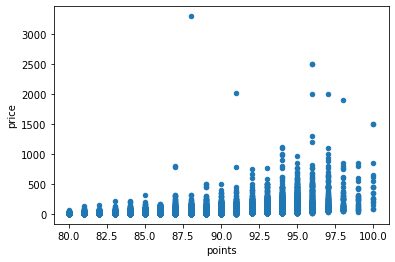

In [74]:
 df.plot(kind="scatter", x="points", y="price")

plt.show()

**Comparamos precios con puntuaciones. Las mejores puntuaciones se concentran en torno a los 93 puntos

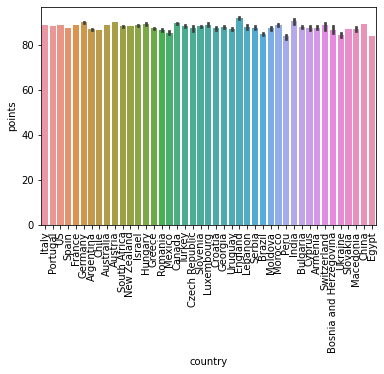

In [85]:
sns.barplot(x="country", y="points", data=df)
plt.xticks(rotation=90)
plt.show()

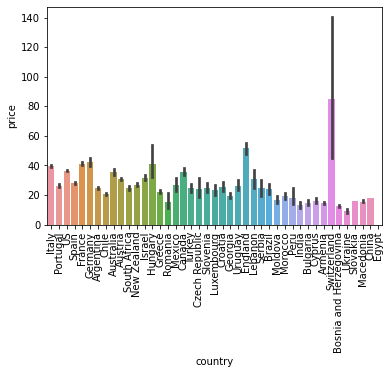

In [86]:
sns.barplot(x="country", y="price", data=df)
plt.xticks(rotation=90)
plt.show()